<class 'pandas.core.frame.DataFrame'>
0     12.00
1     11.00
2     11.00
3     11.20
4     10.80
5     10.80
6     10.80
7     10.60
8     10.80
9     10.30
10    10.30
11    10.30
12    10.40
13    10.50
14    10.20
15    10.00
16     9.95
17    10.14
18    10.06
19    10.25
20     9.99
21     9.92
22     9.96
23     9.84
24     9.87
25     9.85
26     9.69
Name: mens, dtype: float64
m= -0.013330885710959691 and b= 36.416455902501085
Epoch 1/1000


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


1/1 [==============================] - 0s 2ms/step - loss: 113.4292 - accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 107.8628 - accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 102.5760 - accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 97.5549 - accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 92.7861 - accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 88.2568 - accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 83.9550 - accuracy: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 79.8693 - accuracy: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 75.9888 - accuracy: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 72.3031 - 

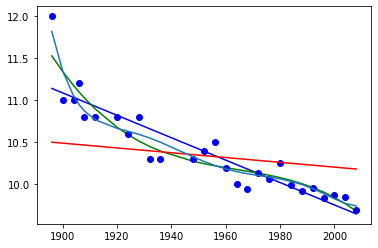

In [ ]:
import tensorflow as tf
import keras as kr
import pandas as pd
import numpy as np
winningTime = pd.read_csv("mensTime.csv")
print(type(winningTime))  #DataFrame or dictionary 
print(winningTime.mens) # a column of all the names...
results= np.polyfit(winningTime.year, winningTime.mens,1)
m = results[0]
b = results[1]
print ("m= "+str(m)+" and b= "+str(b))
resultsCubic= np.polyfit(winningTime.year, winningTime.mens,3)
m1= resultsCubic[0]
m2=resultsCubic[1]
m3=resultsCubic[2]
m4=resultsCubic[3]
resultsEight = np.polyfit(winningTime.year,winningTime.mens,8)
#new_model = tf.saved_model.load("saved_model")


#now another way...
model = kr.Sequential([kr.layers.Dense(units=1, input_shape= [1,])])
model.compile(optimizer='sgd', loss="mean_squared_error", metrics=["accuracy"] )
minimumYear=winningTime.year.min()
maximumYear=winningTime.year.max()
#print(minimumYear, maximumYear)
xs=winningTime.year-minimumYear
#print("after subtracting min")
#print(xs)
xs=xs/(maximumYear-minimumYear) #we normalize the x's so it is nicely spread between 0 and 1.
ys=winningTime.mens

sum = 0.0

#print("now xs normalized")

model.fit(xs, ys, epochs=1000)

print ("now the prediction ... ")
#print (model([0.9861]))
#predictions = new_model.predict(xs, verbose=0)
#model = tf.saved_model.load("the_saved_model") 
predictions = model.predict(xs, verbose=1)
print("the model: ")
#print (new_model.weights)
print ( model.predict([0.39, 0.73, 0.9861, 1.14], verbose=0))
tf.saved_model.save(model, "the_saved_model")
import numpy as np
import matplotlib.pyplot as plt

x = xs
y = ys

# now x is back to normal.
x = 112*xs+1896

fig = plt.figure()
plt.plot(x,m*x+b,'b-') # blue line : Statistics linear model
plt.plot(x,m1*x*x*x+m2*x*x+m3*x+m4,'g-')
plt.plot(x, y,'bo') # data points with blue dots
plt.plot(x,predictions,'r-') # red line : AI model, 2500 iterations. 
columnToAdd = [1.0]*len(x)
matriX = pd.DataFrame()
degree = 8
for i in range(0,degree):
  matriX.insert(i, column=i, value=x**(8-i))

matriX.insert(8, column=8, value = columnToAdd)
matrixForMult = matriX.to_numpy()
print(resultsEight)
yEight=np.matmul(matrixForMult,resultsEight)
print(yEight)
plt.plot(x,yEight,'-')

fig.savefig("overfit.jpg")


# New Section